# (1+1)-ES Algorithm vs. Rechenberg's 1/5 Success Rule
Task: Implement a (1+1)-ES and test it on the benchmark set in the appendix for
N = 5, 10, 20 dimensions, each with 100 repetitions What is the influence of the
problem dimensions.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [29]:
x = np.random.randn(20)
print(x)

[-1.00822792 -0.01711528 -0.48887706 -0.09145347  0.66804856  1.2525021
 -0.79063018 -1.36007268 -1.7619833   0.46950457  0.64794622 -0.79835084
  0.00359113 -0.10062113 -2.26633262  0.50402189 -0.13568267 -0.07814729
 -0.34845927  0.70307849]


In [30]:
# Step 1.1: Implement the (1+1)-ES Algorithm
def one_plus_one_es(dim, objective_function, sigma=0.01, iterations=1000):
    # Initialize the solution randomly
    x = np.random.randn(dim)
    # Track the best solution and its objective value
    best_x = x
    best_obj = objective_function(x)
    log = np.zeros(iterations)  # Log of best objective value at each iteration

    for _ in range(iterations):
        # Mutate the solution
        x_mutated = x + np.random.normal(0, sigma, dim)
        # Evaluate the objective function for the mutated solution
        obj_mutated = objective_function(x_mutated)

        # Selection step: if the mutated solution is better, replace the current solution with it
        if obj_mutated < best_obj:
            x = x_mutated
            best_x = x_mutated
            best_obj = obj_mutated
        log[_] = best_obj
    return best_x, best_obj, log

In [31]:
# Step 1.2: Implement the Rechenberg's 1/5 Success Rule
def rechenberg_es(dim, objective_function, sigma=0.01, iterations=1000, d=1.):
    # Initialize the solution randomly
    x = np.random.randn(dim)
    # Track the best solution and its objective value
    best_x = x
    best_obj = objective_function(x)
    log = np.zeros(iterations)  # Log of best objective value at each iteration

    for _ in range(iterations):
        # Mutate the solution
        x_mutated = x + np.random.normal(0, sigma, dim)
        # Evaluate the objective function for the mutated solution
        obj_mutated = objective_function(x_mutated)

        if obj_mutated <= best_obj:
            x = x_mutated
            best_x = x_mutated
            best_obj = obj_mutated
            sigma = sigma * math.e ** (4 / 5 / d)
        else:
            sigma = sigma * math.e ** (-1 / 5 / d)

        log[_] = best_obj
    return best_x, best_obj, log

In [32]:
# Step 2: Define Benchmark Functions
def sphere_function(x):
    return np.sum(x ** 2)


def rastrigin_function(x):
    return 10 * len(x) + np.sum(x ** 2 - 10 * np.cos(2 * np.pi * x))

In [33]:
# Experiment Parameters
dimensions = [5, 10, 20]
repetitions = 100
iterations = 1000
sigma = 0.01
results = {}
fitness_logs = {}

# Step 3: Experiment Setup
for dim in dimensions:
    results[dim] = {'Sphere': {'rechenberg_es': [], 'one_plus_one_es': []},
                    'Rastrigin': {'rechenberg_es': [], 'one_plus_one_es': []}}
    fitness_logs[dim] = {'Sphere': {'rechenberg_es': [], 'one_plus_one_es': []},
                         'Rastrigin': {'rechenberg_es': [], 'one_plus_one_es': []}}
    for _ in range(repetitions):
        # Sphere Function
        _, obj_sphere, log_sphere = rechenberg_es(dim, sphere_function, sigma, iterations)
        results[dim]['Sphere']['rechenberg_es'].append(obj_sphere)
        fitness_logs[dim]['Sphere']['rechenberg_es'].append(log_sphere)

        _, obj_sphere, log_sphere = one_plus_one_es(dim, sphere_function, sigma, iterations)
        results[dim]['Sphere']['one_plus_one_es'].append(obj_sphere)
        fitness_logs[dim]['Sphere']['one_plus_one_es'].append(log_sphere)

        # Rastrigin Function
        _, obj_rastrigin, log_rastrigin = rechenberg_es(dim, rastrigin_function, sigma, iterations)
        results[dim]['Rastrigin']['rechenberg_es'].append(obj_rastrigin)
        fitness_logs[dim]['Rastrigin']['rechenberg_es'].append(log_rastrigin)

        _, obj_rastrigin, log_rastrigin = one_plus_one_es(dim, rastrigin_function, sigma, iterations)
        results[dim]['Rastrigin']['one_plus_one_es'].append(obj_rastrigin)
        fitness_logs[dim]['Rastrigin']['one_plus_one_es'].append(log_rastrigin)

# Display initial 5 results
# results[dim]['Sphere'][:5], results[dim]['Rastrigin'][:5]
# fitness_logs[dim]['Sphere'][:5], fitness_logs[dim]['Rastrigin'][:5]

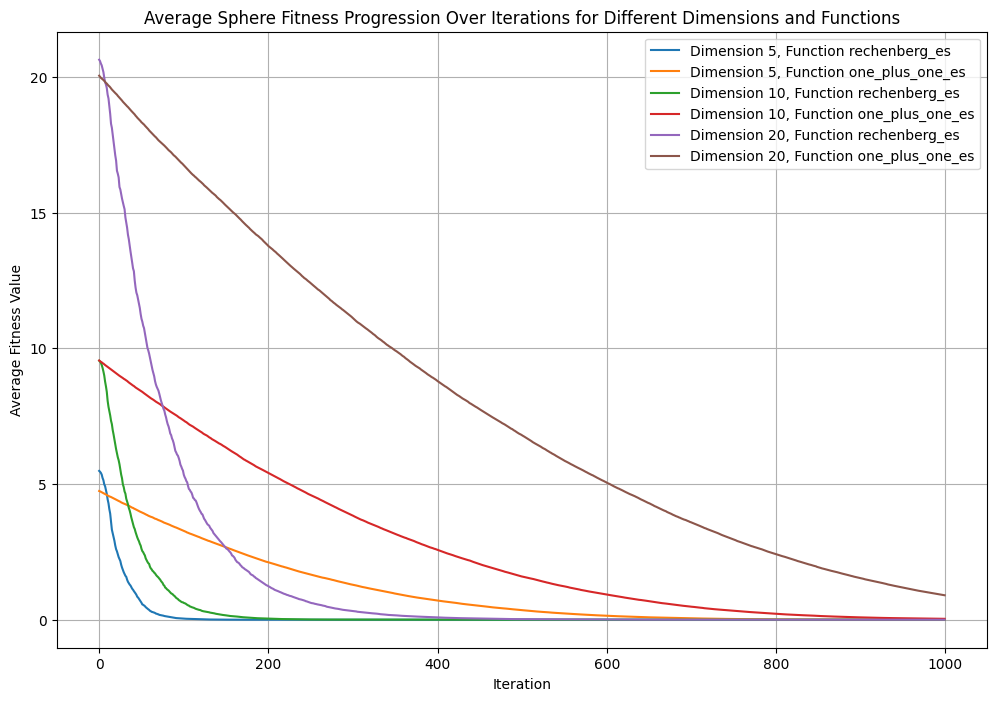

In [34]:
def plot_average_fitness_progression(logs, dimensions, fittype='Sphere'):
    plt.figure(figsize=(12, 8))

    for dim in dimensions:
        for func in ['rechenberg_es', 'one_plus_one_es']:
            # Calculate the mean fitness progression for each dimension and function
            mean_progression = np.mean(logs[dim][fittype][func], axis=0)
            plt.plot(mean_progression, label=f'Dimension {dim}, Function {func}')

    plt.xlabel('Iteration')
    plt.ylabel('Average Fitness Value')
    plt.title(f'Average {fittype} Fitness Progression Over Iterations for Different Dimensions and Functions')
    plt.legend()
    plt.grid(True)
    plt.show()


plot_average_fitness_progression(fitness_logs, dimensions)